# Multiple Linear Regression
Download the dataset from Moodle or Kaggle:    
https://www.kaggle.com/code/divan0/multiple-linear-regression/data

In this example we want to explain the price of an appartement using multiple variables (for example size, number of rooms, etc. That is, we predict one response variable (aka target variable, dependent variable etc) from multiple input variables (aka "explanatory variables", feature, independent variables)


Note: Multiple Linear Regression is not the same as Multivariate Regression.

In [8]:
import pandas
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline



In [3]:
house_df = pandas.read_csv('kc_house_data.csv')
print(house_df.info())
house_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_price_data = house_df[['price', 'bedrooms', 'sqft_living', 'yr_built']]
house_price_data = house_price_data.sample(n=5000, random_state=12345, replace=False)
# do some cleaning. Here, we do not care about the optimal values. Just remove some data:
house_price_data = house_price_data[house_price_data.price.notnull() & (house_price_data.price>100)  & (house_price_data.price < 3e6)]
house_price_data = house_price_data[house_price_data.bedrooms.notnull() & (house_price_data.bedrooms >= 1)]
house_price_data = house_price_data[house_price_data.price.notnull() & (house_price_data.sqft_living>10)  & (house_price_data.sqft_living < 5000)]
house_price_data = house_price_data[house_price_data.yr_built.notnull() & (house_price_data.yr_built>1900)  & (house_price_data.yr_built < 2010)]

# head shows the first 5 rows. We use this to verify we correctly loaded the data
house_price_data.head()

,price,bedrooms,sqft_living,yr_built
3188,200000.0,2,950,1955
19014,717500.0,3,2530,1995
15070,430000.0,8,4300,1979
4512,312000.0,3,2280,2008
14765,780000.0,3,2940,1994


Before doing any modelling, it's always a good idea to explore the data:

c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


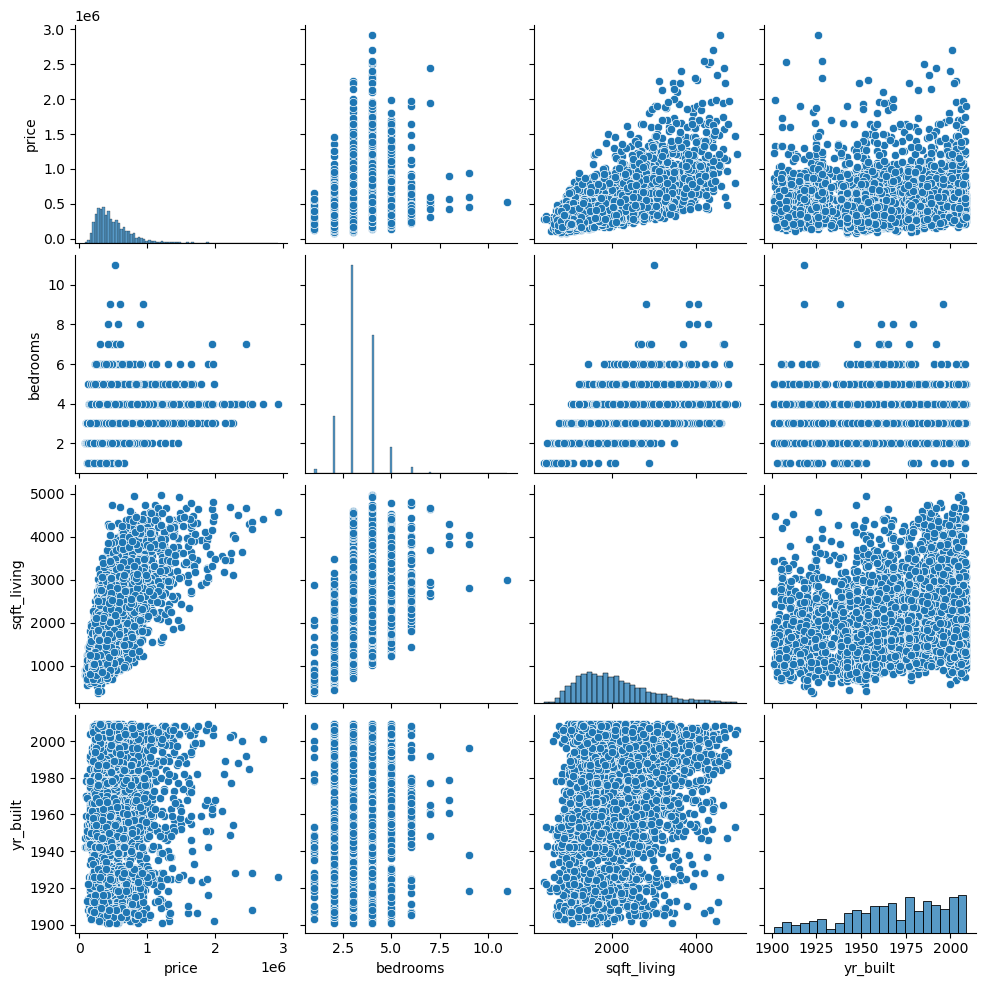

In [5]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sb.pairplot(house_price_data)

### Simple Linear Regression
The dependent variable (here price) is explained using only a **single** independent variable: 
  
Model 1:  
$price = a_1\cdot area + intercept_1$  


In [10]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

MSE sqft_living model= 50592571010.18178


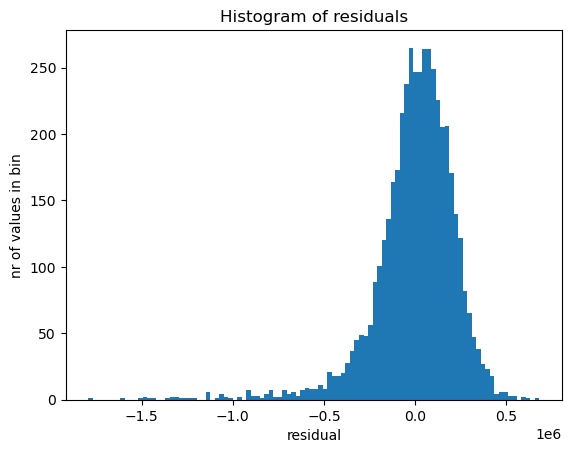

In [12]:
simple_linear_regression_model_area = linear_model.LinearRegression()
simple_linear_regression_model_area.fit(house_price_data[[ 'sqft_living']],house_price_data['price'])
simple_linear_regression_model_area.coef_

predicted_price = simple_linear_regression_model_area.predict(house_price_data[[ 'sqft_living']])
residuals = predicted_price - house_price_data['price']
plt.hist(residuals, bins=100)
plt.title('Histogram of residuals')
plt.xlabel("residual")
plt.ylabel("nr of values in bin")
# MSE_sqft_living = np.sum(residuals**2)/residuals.size
MSE_sqft_living = mean_squared_error(predicted_price, house_price_data['price'])
print('MSE sqft_living model= {}'.format(MSE_sqft_living))



### complex model: linear model with 3 independent variables

MSE multiple linear regression model= 45653793416.58571


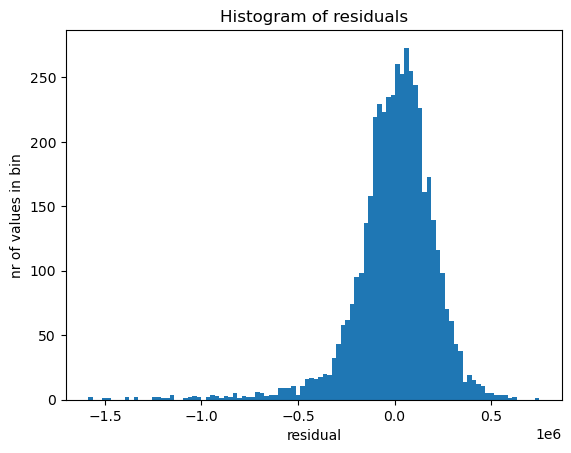

In [13]:
multi_lin_model = linear_model.LinearRegression()

X = house_price_data[[ 'bedrooms', 'sqft_living', 'yr_built']]
Y = house_price_data['price']

multi_lin_model.fit(X,Y)

predicted_price = multi_lin_model.predict(house_price_data[['bedrooms', 'sqft_living', 'yr_built']])
residuals = predicted_price - house_price_data['price']

plt.hist(residuals, bins=100)
plt.title('Histogram of residuals')
plt.xlabel("residual")
plt.ylabel("nr of values in bin")

MSE_multiple = np.sum(residuals**2)/residuals.size
print('MSE multiple linear regression model= {}'.format(MSE_multiple))


model parameters:

In [14]:
print(multi_lin_model.coef_)
print(multi_lin_model.intercept_)


[-50721.21231576    296.01057698  -2298.23478381]
4609791.370370234


# Polynomial Regression (and feature engineering)

Is this a linear model:  
$y=ax^2 + bx + c$

No. But it is **linear in the parameters**  

We can apply linear regression to arbitrarily complex models, as long as it is linear in the **unknowns**.  
Example, linear in a, b, c:  
$y= a \cdot sin(x) + b \cdot exp( x) $

## Can we still use linear regression to fit a model?
- from observation, we assume a relationship of the type $y = ax^3 + bx^2 +cx + d$  
- X is known. Therefore we can calculate $x^3$, $x^2$, $x^1$   
- How does this differ from the previous example of multiple linear regression, price = f(surface, year_built, ...) ?


It doesn't

How to proceed:  
1. calculate the "features"
2. apply multiple linear regression to recover the feature weights

## Remarks:
- For Polynomials, check out numpy.polyfit  
  https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html  
- The approach shown here is more general. It also works if we create arbitrary complex features f(X).
- calculating features from data is called **feature engineering**